Train Using Resnet Instead of VGG

📦 Loading data...
Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
🔍 Extracting ResNet50 features...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 895ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 803ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 827ms/step
📉 Applying PCA...


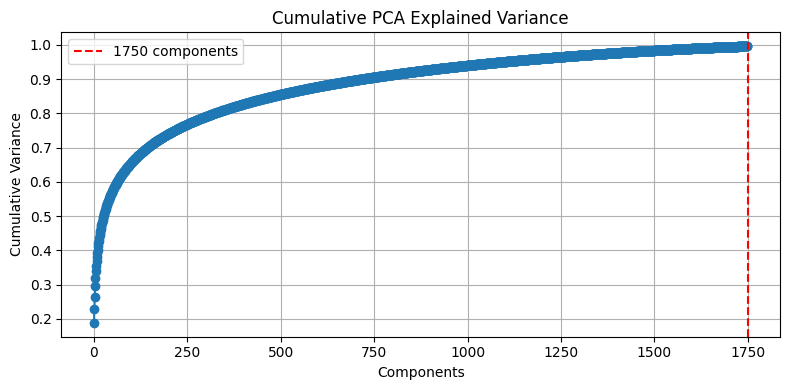

🔧 Grid Searching all SVM kernels...

🔍 Kernel = linear
Fitting 3 folds for each of 3 candidates, totalling 9 fits
🎯 Best Parameters: {'svm__C': 0.1}
✅ Validation Accuracy (linear): 0.7600
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       200
           1       0.77      0.74      0.76       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



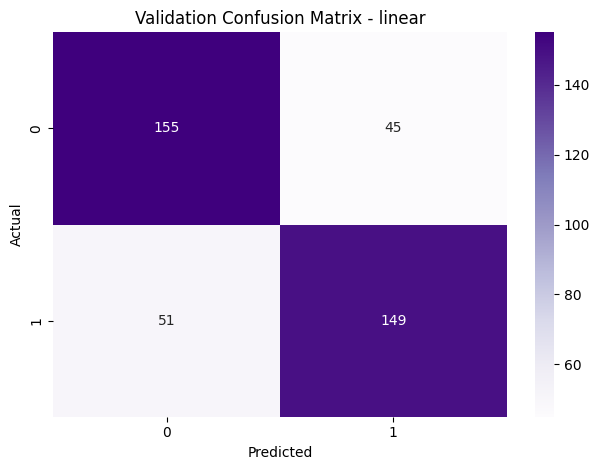

🧪 Test Accuracy (linear): 0.7675
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       200
           1       0.74      0.83      0.78       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



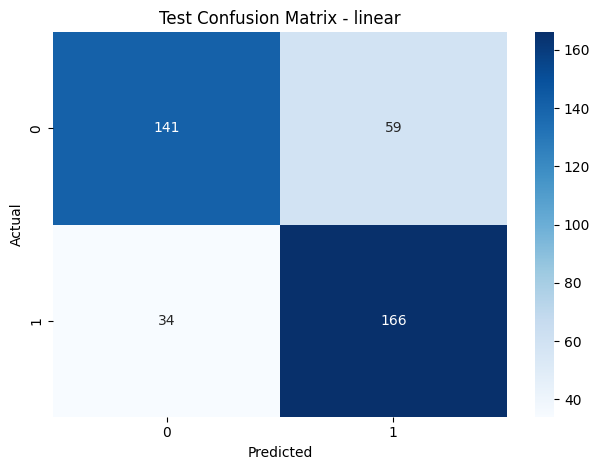


🔍 Kernel = poly
Fitting 3 folds for each of 12 candidates, totalling 36 fits
🎯 Best Parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale'}
✅ Validation Accuracy (poly): 0.7850
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       200
           1       0.75      0.85      0.80       200

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



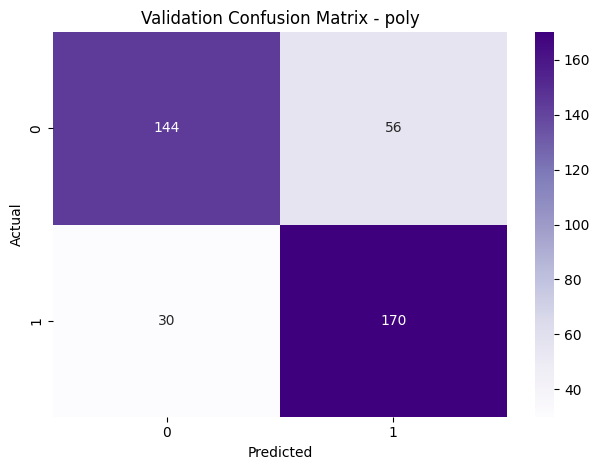

🧪 Test Accuracy (poly): 0.7650
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       200
           1       0.72      0.87      0.79       200

    accuracy                           0.77       400
   macro avg       0.78      0.77      0.76       400
weighted avg       0.78      0.77      0.76       400



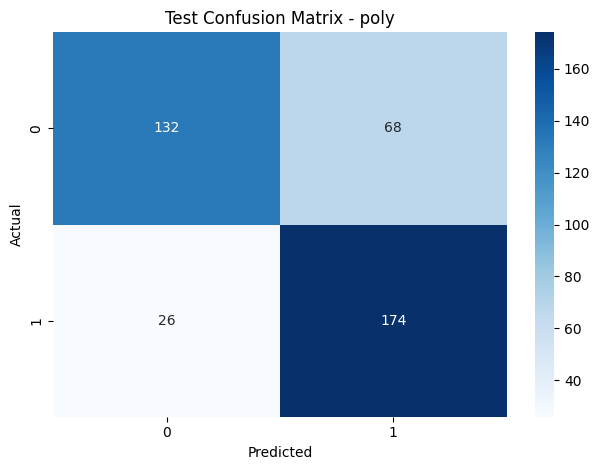


🔍 Kernel = rbf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
🎯 Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale'}
✅ Validation Accuracy (rbf): 0.7025
              precision    recall  f1-score   support

           0       0.92      0.45      0.60       200
           1       0.63      0.96      0.76       200

    accuracy                           0.70       400
   macro avg       0.78      0.70      0.68       400
weighted avg       0.78      0.70      0.68       400



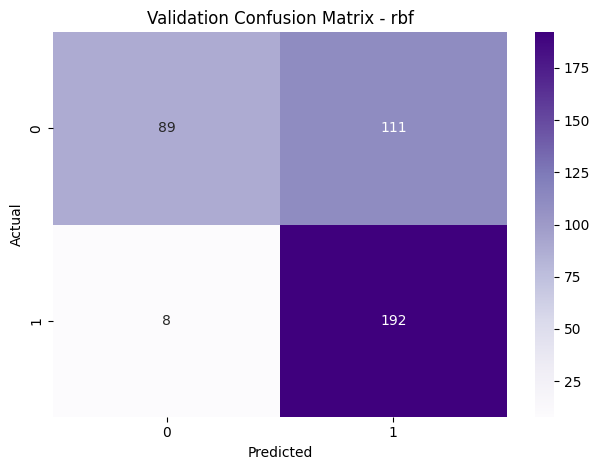

🧪 Test Accuracy (rbf): 0.6500
              precision    recall  f1-score   support

           0       0.89      0.34      0.49       200
           1       0.59      0.96      0.73       200

    accuracy                           0.65       400
   macro avg       0.74      0.65      0.61       400
weighted avg       0.74      0.65      0.61       400



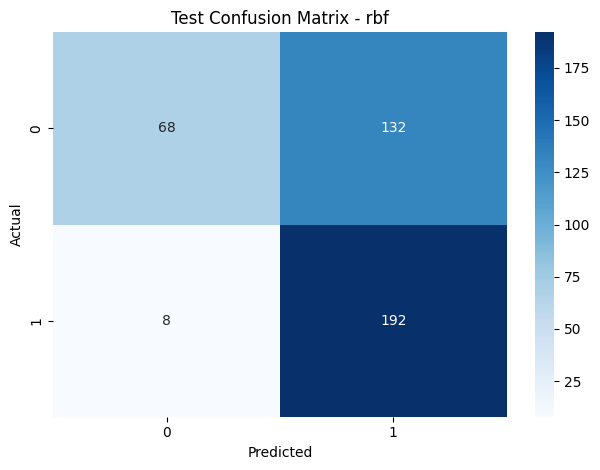


🔍 Kernel = sigmoid
Fitting 3 folds for each of 6 candidates, totalling 18 fits
🎯 Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale'}
✅ Validation Accuracy (sigmoid): 0.7625
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       200
           1       0.78      0.72      0.75       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



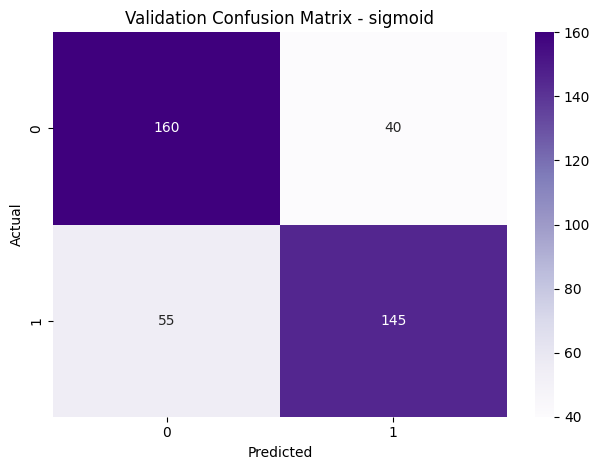

🧪 Test Accuracy (sigmoid): 0.7675
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       200
           1       0.74      0.81      0.78       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



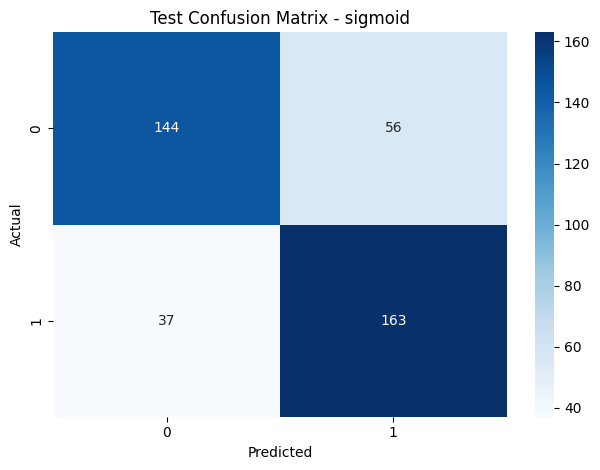


📊 Summary of Results:
LINEAR: Val Acc = 0.7600, Test Acc = 0.7675, Params = {'svm__C': 0.1}
POLY: Val Acc = 0.7850, Test Acc = 0.7650, Params = {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale'}
RBF: Val Acc = 0.7025, Test Acc = 0.6500, Params = {'svm__C': 10, 'svm__gamma': 'scale'}
SIGMOID: Val Acc = 0.7625, Test Acc = 0.7675, Params = {'svm__C': 1, 'svm__gamma': 'scale'}


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Constants ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "dataset"
RANDOM_STATE = 42
PCA_COMPONENTS = 1750

# === Step 1: Load Image Data ===
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

def load_data(split):
    return datagen.flow_from_directory(
        os.path.join(DATASET_PATH, split),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

print("📦 Loading data...")
train_gen = load_data("train")
val_gen = load_data("validation")
test_gen = load_data("test")

# === Step 2: Feature Extraction via ResNet50 ===
print("🔍 Extracting ResNet50 features...")
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet.trainable = False

def extract_features(generator):
    features = resnet.predict(generator, verbose=1)
    return features.reshape(features.shape[0], -1), generator.classes

X_train, y_train = extract_features(train_gen)
X_val, y_val = extract_features(val_gen)
X_test, y_test = extract_features(test_gen)

X_train, y_train = shuffle(X_train, y_train, random_state=RANDOM_STATE)

# === Step 3: PCA ===
print("📉 Applying PCA...")
pca = PCA(n_components=PCA_COMPONENTS, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# PCA Variance Plot
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axvline(PCA_COMPONENTS, color='red', linestyle='--', label=f"{PCA_COMPONENTS} components")
plt.title("Cumulative PCA Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Step 4: Grid Search for All Kernels (not just best) ===
print("🔧 Grid Searching all SVM kernels...")

results = {}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"\n🔍 Kernel = {kernel}")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel=kernel, class_weight='balanced', random_state=RANDOM_STATE))
    ])

    param_grid = {
        'svm__C': [0.1, 1, 10],
    }
    if kernel == 'poly':
        param_grid['svm__degree'] = [2, 3]
    if kernel in ['rbf', 'poly', 'sigmoid']:
        param_grid['svm__gamma'] = ['scale', 'auto']

    grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid.fit(X_train_pca, y_train)

    print("🎯 Best Parameters:", grid.best_params_)
    best_model = grid.best_estimator_

    # === Validation Evaluation ===
    y_val_pred = best_model.predict(X_val_pca)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f"✅ Validation Accuracy ({kernel}): {val_acc:.4f}")
    print(classification_report(y_val, y_val_pred))
    sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Purples')
    plt.title(f"Validation Confusion Matrix - {kernel}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # === Test Evaluation ===
    y_test_pred = best_model.predict(X_test_pca)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"🧪 Test Accuracy ({kernel}): {test_acc:.4f}")
    print(classification_report(y_test, y_test_pred))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Test Confusion Matrix - {kernel}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Store results
    results[kernel] = {
        'val_acc': val_acc,
        'test_acc': test_acc,
        'params': grid.best_params_
    }

# Summary Table
print("\n📊 Summary of Results:")
for kernel, metrics in results.items():
    print(f"{kernel.upper()}: Val Acc = {metrics['val_acc']:.4f}, Test Acc = {metrics['test_acc']:.4f}, Params = {metrics['params']}")
